# CS6120 - Assignment 1 Part 2

Sanjiv Motilal Choudhari

# 1. Data Preparation

In [2]:
import nltk
nltk.download('punkt_tab')
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
            for category in movie_reviews.categories()
            for fileid in movie_reviews.fileids(category)]

import random
random.shuffle(documents)

print("Sample Review:", documents[0][0][:10])  # Displaying the first 10 words
print("Label:", documents[0][1])

from nltk.tokenize import word_tokenize  # punkt tokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Initializes stemmer and stopwords
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Converts to lower case and tokenizes using the punkt tokenizer
    tokens = word_tokenize(' '.join(text).lower())

    # Removes stopwords and stem
    tokens = [stemmer.stem(token) for token in tokens
             if token.isalnum() and token not in stop_words]

    return ' '.join(tokens)

# Process all documents
processed_docs = [(preprocess_text(text), label) for text, label in documents]

# Prints a sample processed document
print("\nSample processed document:")
print("Processed text:", processed_docs[0][0][:100])
print("Label:", processed_docs[0][1])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Sample Review: ['the', 'happy', 'bastard', "'", 's', '30', '-', 'second', 'review', 'big']
Label: pos


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Sample processed document:
Processed text: happi bastard 30 second review big daddi happi gilmor father cours latest scenario present adam sand
Label: pos


In [10]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

def preprocess_text(text):
    # Initialize stemmer and stopwords
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Convert to lower case and tokenize using punkt tokenizer
    tokens = word_tokenize(' '.join(text).lower())

    # Remove stopwords and stem
    tokens = [stemmer.stem(token) for token in tokens
                 if token.isalnum() and token not in stop_words]

    return ' '.join(tokens)

def prepare_dataset():
    # Access the movie reviews and labels
    documents = [(list(movie_reviews.words(fileid)), category)
                for category in movie_reviews.categories()
                for fileid in movie_reviews.fileids(category)]
    processed_docs = [(preprocess_text(text), label) for text, label in documents]

    return processed_docs

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


# 2. Coverage Analysis Insights

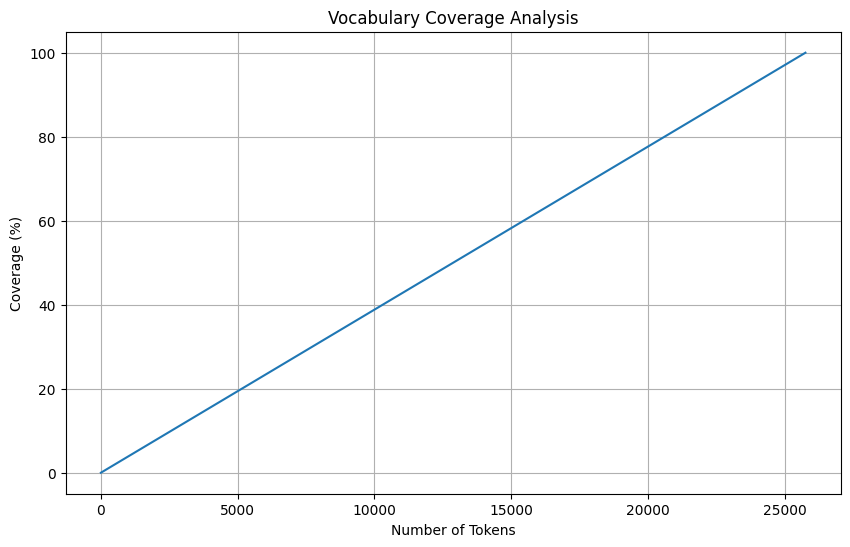


Coverage Analysis Insights:
Total unique words: 25750
90% coverage achieved at: 23174 tokens
95% coverage achieved at: 24462 tokens


In [11]:
from collections import Counter
import matplotlib.pyplot as plt


def perform_coverage_analysis(processed_docs):
    # Get all words from processed documents
    all_words = []
    for doc, _ in processed_docs:
        all_words.extend(doc.split())

    # Count the word frequencies
    word_freq = Counter(all_words)
    total_words = len(all_words)
    unique_words = len(word_freq)

    # Calculate coverage
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    coverage = []
    covered_words = set()

    for word, freq in sorted_words:
        covered_words.add(word)
        coverage.append(len(covered_words) / unique_words * 100)

    # Plot the coverage analysis
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(coverage) + 1), coverage)
    plt.xlabel('Number of Tokens')
    plt.ylabel('Coverage (%)')
    plt.title('Vocabulary Coverage Analysis')
    plt.grid(True)
    plt.show()

    # Print coverage
    print("\nCoverage Analysis Insights:")
    print(f"Total unique words: {unique_words}")
    print(f"90% coverage achieved at: {next(i for i, c in enumerate(coverage) if c >= 90)} tokens")
    print(f"95% coverage achieved at: {next(i for i, c in enumerate(coverage) if c >= 95)} tokens")

    return sorted_words

if __name__ == "__main__":
    processed_docs = prepare_dataset() # Call the prepare_dataset function
    sorted_words = perform_coverage_analysis(processed_docs)

# 3. Algorithm Implementation

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

class SentimentClassifier:
    def __init__(self, max_features=5000):
        self.max_features = max_features
        self.count_vectorizer = CountVectorizer(max_features=max_features)
        self.tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

        # Initialize classifiers
        self.naive_bayes = MultinomialNB()
        self.logistic_regression = LogisticRegression(max_iter=1000)
        self.mlp = MLPClassifier(
            hidden_layer_sizes=(100, 50),
            max_iter=1000,
            random_state=42
        )

    def prepare_features(self, processed_docs):
        texts = [doc for doc, _ in processed_docs]
        labels = [1 if label == 'pos' else 0 for _, label in processed_docs]

        # Generate both TF and TF-IDF features
        tf_features = self.count_vectorizer.fit_transform(texts)
        tfidf_features = self.tfidf_vectorizer.fit_transform(texts)

        return tf_features, tfidf_features, labels

    def train_naive_bayes(self, X, y):
        return self.naive_bayes.fit(X, y)

    def train_logistic_regression(self, X, y):
        return self.logistic_regression.fit(X, y)

    def train_mlp(self, X, y):
        return self.mlp.fit(X, y)

if __name__ == "__main__":

    # Prepare data
    processed_docs = prepare_dataset()

    # Initialize classifier
    classifier = SentimentClassifier()

    # Prepare features
    tf_features, tfidf_features, labels = classifier.prepare_features(processed_docs)

    print("Feature matrices created:")
    print(f"TF features shape: {tf_features.shape}")
    print(f"TF-IDF features shape: {tfidf_features.shape}")

Feature matrices created:
TF features shape: (2000, 5000)
TF-IDF features shape: (2000, 5000)


# 4. Training and Evaluation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

def train_and_evaluate(X, y, model, model_name):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate TPR and FPR
    tn, fp, fn, tp = conf_matrix.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"True Positive Rate: {tpr:.4f}")
    print(f"False Positive Rate: {fpr:.4f}")

    return accuracy, tpr, fpr

if __name__ == "__main__":

    # Prepare data and features
    processed_docs = prepare_dataset()
    classifier = SentimentClassifier()
    tf_features, tfidf_features, labels = classifier.prepare_features(processed_docs)

    # Train and evaluate each model with both TF and TF-IDF features
    feature_sets = {
        'TF': tf_features,
        'TF-IDF': tfidf_features
    }

    models = {
        'Naive Bayes': classifier.naive_bayes,
        'Logistic Regression': classifier.logistic_regression,
        'MLP': classifier.mlp
    }

    results = []
    for feature_name, features in feature_sets.items():
        print(f"\nEvaluating with {feature_name} features:")
        for model_name, model in models.items():
            accuracy, tpr, fpr = train_and_evaluate(features, labels, model, model_name)
            results.append({
                'Model': model_name,
                'Features': feature_name,
                'Accuracy': accuracy,
                'TPR': tpr,
                'FPR': fpr
            })


Evaluating with TF features:

Naive Bayes Results:
Accuracy: 0.8050
True Positive Rate: 0.7761
False Positive Rate: 0.1658

Logistic Regression Results:
Accuracy: 0.8300
True Positive Rate: 0.8259
False Positive Rate: 0.1658

MLP Results:
Accuracy: 0.8325
True Positive Rate: 0.8159
False Positive Rate: 0.1508

Evaluating with TF-IDF features:

Naive Bayes Results:
Accuracy: 0.8000
True Positive Rate: 0.7711
False Positive Rate: 0.1709

Logistic Regression Results:
Accuracy: 0.8025
True Positive Rate: 0.8010
False Positive Rate: 0.1960

MLP Results:
Accuracy: 0.8250
True Positive Rate: 0.8308
False Positive Rate: 0.1809


# 5. Visualization and Analysis

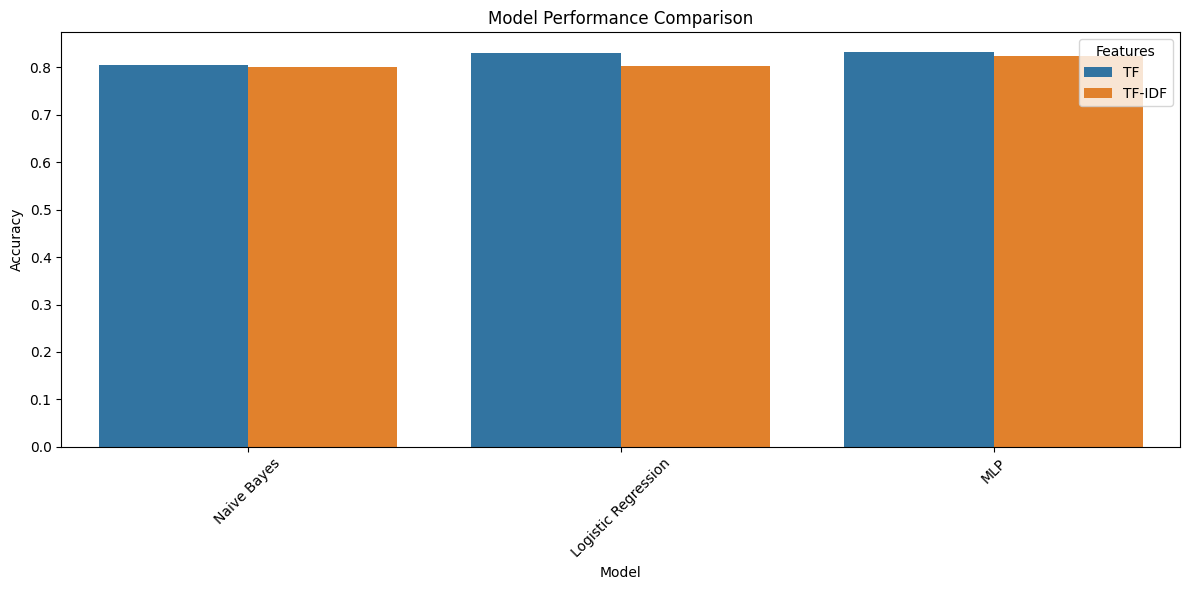

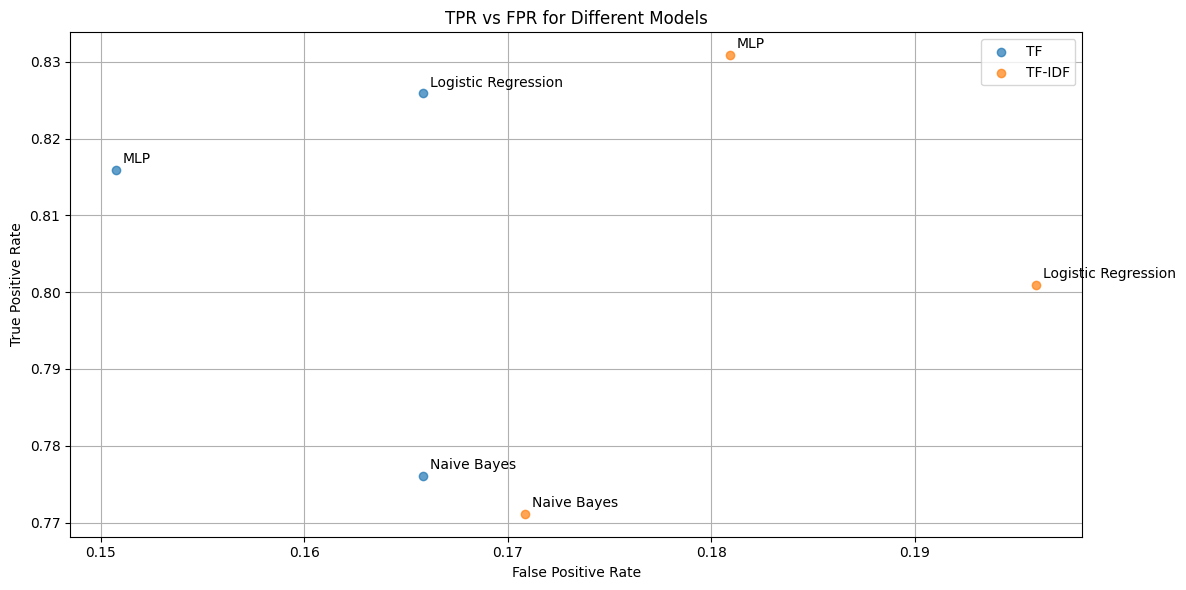


Detailed Results:
              Model Features  Accuracy      TPR      FPR
        Naive Bayes       TF    0.8050 0.776119 0.165829
Logistic Regression       TF    0.8300 0.825871 0.165829
                MLP       TF    0.8325 0.815920 0.150754
        Naive Bayes   TF-IDF    0.8000 0.771144 0.170854
Logistic Regression   TF-IDF    0.8025 0.800995 0.195980
                MLP   TF-IDF    0.8250 0.830846 0.180905


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_results(results):
    # Convert results to DataFrame
    df = pd.DataFrame(results)

    # Create accuracy comparison plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Accuracy', hue='Features', data=df)
    plt.title('Model Performance Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Create TPR vs FPR plot
    plt.figure(figsize=(12, 6))
    for feature in df['Features'].unique():
        feature_data = df[df['Features'] == feature]
        plt.scatter(feature_data['FPR'], feature_data['TPR'],
                   label=feature, alpha=0.7)

        # Add model name annotations
        for _, row in feature_data.iterrows():
            plt.annotate(row['Model'],
                        (row['FPR'], row['TPR']),
                        xytext=(5, 5), textcoords='offset points')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('TPR vs FPR for Different Models')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print detailed results
    print("\nDetailed Results:")
    print(df.to_string(index=False))

if __name__ == "__main__":
    visualize_results(results)

# Exploring Different Architectures for MLP based Classifier


Results for Two Layers (100, 100 neurons) with TF features:
Accuracy: 0.8325
True Positive Rate: 0.8159
False Positive Rate: 0.1508
Training iterations: 16

Results for Three Layers (100, 50, 25 neurons) with TF features:
Accuracy: 0.8400
True Positive Rate: 0.8209
False Positive Rate: 0.1407
Training iterations: 17

Results for Three Layers (200, 100, 50 neurons) with TF features:
Accuracy: 0.8475
True Positive Rate: 0.7960
False Positive Rate: 0.1005
Training iterations: 15

Results for Two Layers (100, 100 neurons) with TF-IDF features:
Accuracy: 0.8225
True Positive Rate: 0.8109
False Positive Rate: 0.1658
Training iterations: 22

Results for Three Layers (100, 50, 25 neurons) with TF-IDF features:
Accuracy: 0.8100
True Positive Rate: 0.7910
False Positive Rate: 0.1709
Training iterations: 18

Results for Three Layers (200, 100, 50 neurons) with TF-IDF features:
Accuracy: 0.8375
True Positive Rate: 0.8209
False Positive Rate: 0.1457
Training iterations: 16


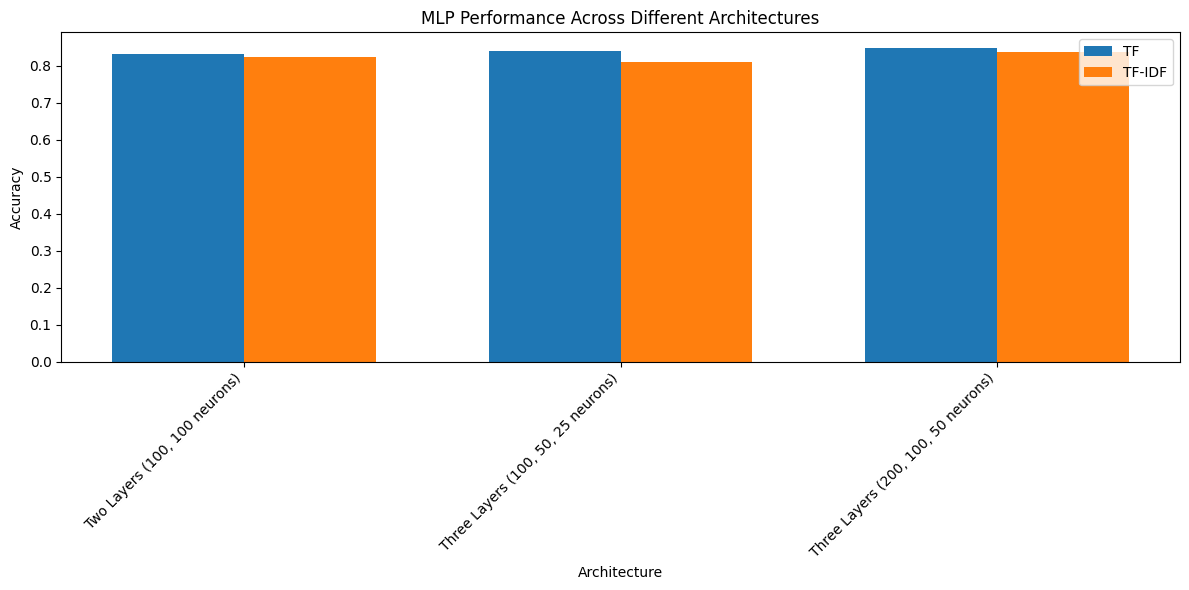

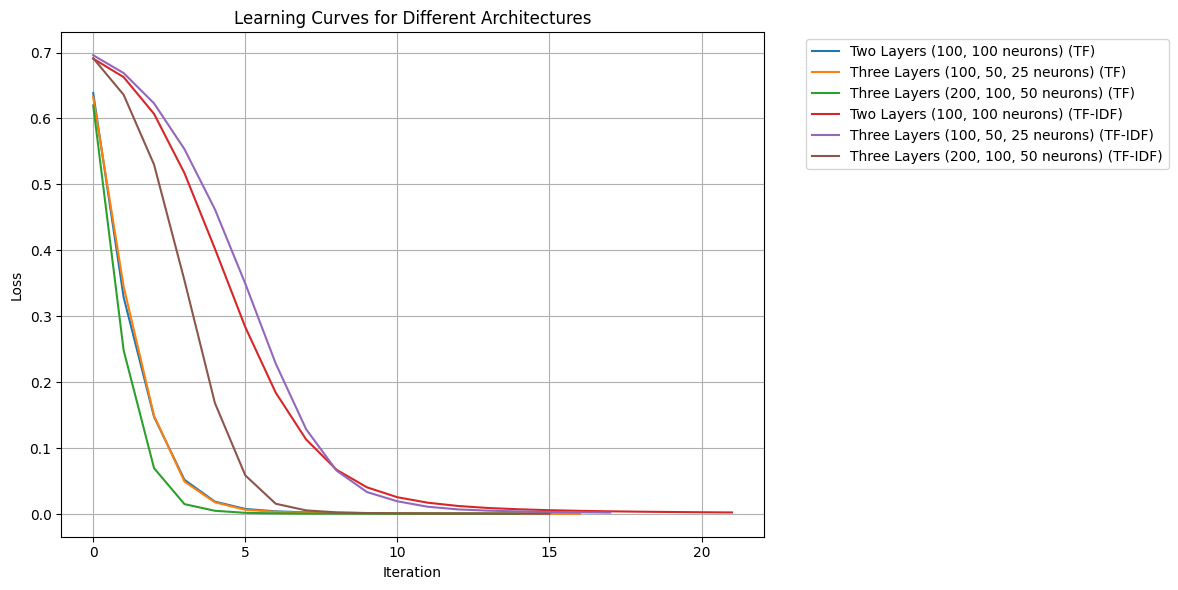

In [20]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class MLPExplorer:
    def __init__(self):
        # Different architectures to explore (Layers and Neurons)
        self.architectures = [
            ((100, 100), "Two Layers (100, 100 neurons)"),
            ((100, 50, 25), "Three Layers (100, 50, 25 neurons)"),
            ((200, 100, 50), "Three Layers (200, 100, 50 neurons)")
        ]

        # Common parameters for all MLPs
        self.common_params = {
            'max_iter': 1000,
            'random_state': 42,
            'early_stopping': True,
            'validation_fraction': 0.1,
            'n_iter_no_change': 10
        }

    def train_and_evaluate(self, X, y, feature_type="TF"):
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        results = []

        for architecture, arch_name in self.architectures:
            # Initialize MLP with current architecture
            mlp = MLPClassifier(
                hidden_layer_sizes=architecture,
                **self.common_params
            )

            # Train model
            mlp.fit(X_train, y_train)

            # Make predictions
            y_pred = mlp.predict(X_test)

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)
            tn, fp, fn, tp = conf_matrix.ravel()
            tpr = tp / (tp + fn)
            fpr = fp / (fp + tn)

            # Store results
            results.append({
                'Architecture': arch_name,
                'Feature_Type': feature_type,
                'Accuracy': accuracy,
                'TPR': tpr,
                'FPR': fpr,
                'Loss': mlp.loss_curve_,
                'N_Iterations': len(mlp.loss_curve_)
            })

            print(f"\nResults for {arch_name} with {feature_type} features:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"True Positive Rate: {tpr:.4f}")
            print(f"False Positive Rate: {fpr:.4f}")
            print(f"Training iterations: {len(mlp.loss_curve_)}")

        return results

    def visualize_results(self, all_results):
        # Plot accuracy comparison
        plt.figure(figsize=(12, 6))
        architectures = [r['Architecture'] for r in all_results if r['Feature_Type'] == 'TF']
        tf_accuracies = [r['Accuracy'] for r in all_results if r['Feature_Type'] == 'TF']
        tfidf_accuracies = [r['Accuracy'] for r in all_results if r['Feature_Type'] == 'TF-IDF']

        x = np.arange(len(architectures))
        width = 0.35

        plt.bar(x - width/2, tf_accuracies, width, label='TF')
        plt.bar(x + width/2, tfidf_accuracies, width, label='TF-IDF')

        plt.xlabel('Architecture')
        plt.ylabel('Accuracy')
        plt.title('MLP Performance Across Different Architectures')
        plt.xticks(x, architectures, rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Plot learning curves
        plt.figure(figsize=(12, 6))
        for result in all_results:
            plt.plot(result['Loss'],
                    label=f"{result['Architecture']} ({result['Feature_Type']})")

        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Learning Curves for Different Architectures')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

    # Prepare data
    processed_docs = prepare_dataset()
    texts = [doc for doc, _ in processed_docs]
    labels = [1 if label == 'pos' else 0 for _, label in processed_docs]

    # Prepare features
    count_vectorizer = CountVectorizer(max_features=5000)
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)

    tf_features = count_vectorizer.fit_transform(texts)
    tfidf_features = tfidf_vectorizer.fit_transform(texts)

    # Initialize MLP explorer
    mlp_explorer = MLPExplorer()

    # Train and evaluate with both feature types
    tf_results = mlp_explorer.train_and_evaluate(tf_features, labels, "TF")
    tfidf_results = mlp_explorer.train_and_evaluate(tfidf_features, labels, "TF-IDF")

    # Visualize all results
    mlp_explorer.visualize_results(tf_results + tfidf_results)